# ATP Tennis Data - Player Diff Stats


In our feature engineering notebooks, we created a dataset for match where we left categorical columns un-encoded. We will run this dataset through various classification models and see how the models perform. I suspect tree based models (especially ensemble models) will perform the best as our data is non-linear

NOTE: since we are not one hot encoding our categories.. this is probably an invalid test. We are purely just getting a quick baseline since this dataset is small


# Summary of Results

* Our best results came from Gradient Boosting with the results below. 
* Only Logistic Regression and Gradient Boosting performed better than our baseline
*  Decision Tree, KNN, and AdaBoost all did below our baseline

```
Model Score: 0.6826468602295747

ROC/AUC Score: 0.682614201415636
              precision    recall  f1-score   support

        Loss       0.68      0.67      0.68      7381
         Win       0.68      0.69      0.69      7429

    accuracy                           0.68     14810
   macro avg       0.68      0.68      0.68     14810
weighted avg       0.68      0.68      0.68     14810
```




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d %H:%m'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "raw"


# sometimes I run these notebooks via command line. Environment variable is set so we know whether we are in DEBUG mode or not
# if you want to manually run this in DEBUG mode, change default value to True
DEBUG = bool(os.environ.get("IPYNB_DEBUG", False))

if DEBUG:
    DESCRIPTION = f"{DESCRIPTION}-test"
    FEATURE_FILE = '../datasets/atp_matches_1985-2019_features_test.csv'
    ModelWrapper.REPORT_FILE = '../reports/summary-test.csv'
else:
    FEATURE_FILE = '../datasets/atp_matches_1985-2019_features.csv'




START_YEAR = 1998
END_YEAR = 2018

LABEL_COL = 'p1_winner'

# random seed
RSTATE = 1
N_JOBS = 4
MAX_ITER = 100



In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR)

# Get our baseline

If we really don't know anything about tennis, then a reasonable way of predicting wins/losses would be by player rank. If we look at our dataset, the accuracy of using this method for prediction would be the baseline accuracy for our model:

If player 1 rank < player 2 rank, then label == 1 (win)
If player 2 rank < player 1 rank, then label == 0 (loss)
Sum these two numbers and divide by total samples would give us the baseline accuracy


In [3]:
tests = pd.concat([X_test, y_test], axis=1)
p1_wins = tests[(tests.p1_rank < tests.p2_rank) & (tests.p1_winner == 1)]
p2_losses = tests[(tests.p2_rank < tests.p1_rank) & (tests.p1_winner == 0)]
baseline_accuracy = (len(p1_wins) + len(p2_losses))/ len(tests)
print(f'Our baseline accuracy should be: {baseline_accuracy}')

Our baseline accuracy should be: 0.6565833896016205


# Logistic Regression

In [4]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_lr = lr.predict()

[LibLinear]

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Model Score: 0.6541525995948684

ROC/AUC Score: 0.6541607842322668
              precision    recall  f1-score   support

        Loss       0.65      0.66      0.65      7381
         Win       0.66      0.65      0.65      7429

    accuracy                           0.65     14810
   macro avg       0.65      0.65      0.65     14810
weighted avg       0.65      0.65      0.65     14810

      Loss   Win
Loss  4847  2534
Win   2588  4841


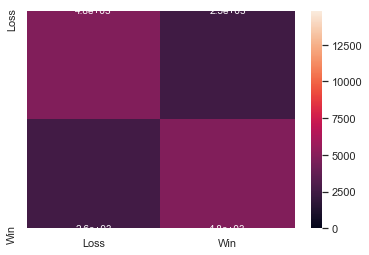

In [5]:
lr.analyze()

In [6]:
# ju.plot_2d(X_test, y_predict_lr)

In [7]:
lr.save()

Saving report: ../reports/summary.csv


/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


# KNN

In [8]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_knn = knn.predict()

Model Score: 0.5858879135719108

ROC/AUC Score: 0.5858772170249587
              precision    recall  f1-score   support

        Loss       0.58      0.58      0.58      7381
         Win       0.59      0.59      0.59      7429

    accuracy                           0.59     14810
   macro avg       0.59      0.59      0.59     14810
weighted avg       0.59      0.59      0.59     14810

      Loss   Win
Loss  4300  3081
Win   3052  4377


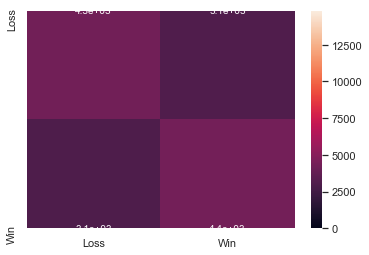

In [9]:
knn.analyze()

In [10]:
# ju.plot_2d(X_test, y_predict_knn)

In [11]:
knn.save()

Saving report: ../reports/summary.csv


/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


# Decision Tree

In [12]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.5964888588791357

ROC/AUC Score: 0.59646536186334
              precision    recall  f1-score   support

        Loss       0.60      0.59      0.59      7381
         Win       0.60      0.60      0.60      7429

    accuracy                           0.60     14810
   macro avg       0.60      0.60      0.60     14810
weighted avg       0.60      0.60      0.60     14810

      Loss   Win
Loss  4349  3032
Win   2944  4485


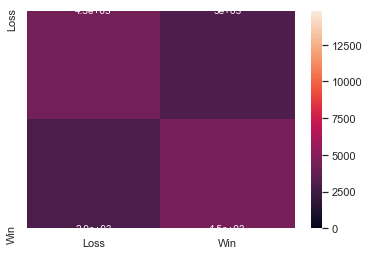

In [13]:
dt.analyze()

In [14]:
# ju.plot_2d(X_test, y_predict_dt)

In [15]:
dt.save()

Saving report: ../reports/summary.csv


/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


# Random Forest Classifier

In [16]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_rf = rf.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Model Score: 0.6401080351114112

ROC/AUC Score: 0.6403384182526982
              precision    recall  f1-score   support

        Loss       0.62      0.71      0.66      7381
         Win       0.67      0.57      0.61      7429

    accuracy                           0.64     14810
   macro avg       0.64      0.64      0.64     14810
weighted avg       0.64      0.64      0.64     14810

      Loss   Win
Loss  5251  2130
Win   3200  4229


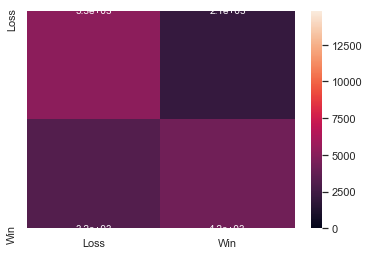

In [17]:
rf.analyze()

In [18]:
# ju.plot_2d(X_test, y_predict_rf)

In [19]:
rf.save()

Saving report: ../reports/summary.csv


/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


# Gradient Boosting

In [20]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3670            3.84s
         2           1.3505            3.77s
         3           1.3357            3.76s
         4           1.3238            3.74s
         5           1.3131            3.68s
         6           1.3044            3.67s
         7           1.2958            3.62s
         8           1.2890            3.63s
         9           1.2825            3.60s
        10           1.2771            3.58s
        20           1.2378            3.05s
        30           1.2038            2.59s
        40           1.1870            2.16s
        50           1.1781            1.73s
        60           1.1702            1.36s
        70           1.1619            1.00s
        80           1.1562            0.66s
        90           1.1526            0.33s
       100           1.1465            0.00s


Model Score: 0.6826468602295747

ROC/AUC Score: 0.682614201415636
              precision    recall  f1-score   support

        Loss       0.68      0.67      0.68      7381
         Win       0.68      0.69      0.69      7429

    accuracy                           0.68     14810
   macro avg       0.68      0.68      0.68     14810
weighted avg       0.68      0.68      0.68     14810

      Loss   Win
Loss  4964  2417
Win   2283  5146


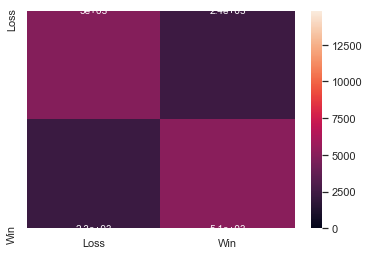

In [21]:
gb.analyze()

In [22]:
# ju.plot_2d(X_test, y_predict_gb)

In [23]:
gb.save()

Saving report: ../reports/summary.csv


/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


# AdaBoost

In [24]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.6652937204591493

ROC/AUC Score: 0.6652575966906623
              precision    recall  f1-score   support

        Loss       0.67      0.65      0.66      7381
         Win       0.66      0.68      0.67      7429

    accuracy                           0.67     14810
   macro avg       0.67      0.67      0.67     14810
weighted avg       0.67      0.67      0.67     14810

      Loss   Win
Loss  4828  2553
Win   2404  5025


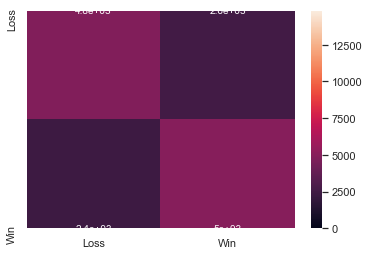

In [25]:
ab.analyze()

In [26]:
# ju.plot_2d(X_test, y_predict_ab)

In [27]:
ab.save()

Saving report: ../reports/summary.csv


/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


# Summary

Decision Tree Classifier did the best with a 92% accuracy score while KNN did the worst at about 60% (below our null hypothesis)

In [28]:
report = pd.read_csv(ab.report_file)
report = report[report.description == DESCRIPTION]
report

,accuracy,classification_report,confusion_matrix,data_file,data_filter_file,description,end_year,fit_time_min,model_file,model_name,predict_time_min,roc_auc_score,start_year,total_time_min
0,0.654153,"{""Loss"": {""precision"": 0.6519166106254203, ""re...","{""0"": {""0"": 4847, ""1"": 2588}, ""1"": {""0"": 2534,...",../datasets/atp_matches_1985-2019_features.csv,NaN,raw,2018,0.0,../models/logisticregression-1998-2018-raw.pkl,LogisticRegression,0.0,0.654161,1998,0.0
1,0.585888,"{""Loss"": {""precision"": 0.5848748639825898, ""re...","{""0"": {""0"": 4300, ""1"": 3052}, ""1"": {""0"": 3081,...",../datasets/atp_matches_1985-2019_features.csv,NaN,raw,2018,0.0,../models/kneighborsclassifier-1998-2018-raw.pkl,KNeighborsClassifier,0.0,0.585877,1998,0.0
2,0.596489,"{""Loss"": {""precision"": 0.5963252433840669, ""re...","{""0"": {""0"": 4349, ""1"": 2944}, ""1"": {""0"": 3032,...",../datasets/atp_matches_1985-2019_features.csv,NaN,raw,2018,0.0,../models/decisiontreeclassifier-1998-2018-raw...,DecisionTreeClassifier,0.0,0.596465,1998,0.0
3,0.640108,"{""Loss"": {""precision"": 0.6213465862028162, ""re...","{""0"": {""0"": 5251, ""1"": 3200}, ""1"": {""0"": 2130,...",../datasets/atp_matches_1985-2019_features.csv,NaN,raw,2018,0.0,../models/randomforestclassifier-1998-2018-raw...,RandomForestClassifier,0.0,0.640338,1998,0.0
4,0.682647,"{""Loss"": {""precision"": 0.684973092314061, ""rec...","{""0"": {""0"": 4964, ""1"": 2283}, ""1"": {""0"": 2417,...",../datasets/atp_matches_1985-2019_features.csv,NaN,raw,2018,0.0,../models/gradientboostingclassifier-1998-2018...,GradientBoostingClassifier,0.0,0.682614,1998,0.0
5,0.665294,"{""Loss"": {""precision"": 0.6675884955752213, ""re...","{""0"": {""0"": 4828, ""1"": 2404}, ""1"": {""0"": 2553,...",../datasets/atp_matches_1985-2019_features.csv,NaN,raw,2018,0.0,../models/adaboostclassifier-1998-2018-raw.pkl,AdaBoostClassifier,0.0,0.665258,1998,0.0
127,0.654153,"{""Loss"": {""precision"": 0.6519166106254203, ""re...","{""0"": {""0"": 4847, ""1"": 2588}, ""1"": {""0"": 2534,...",../datasets/atp_matches_1985-2019_features.csv,NaN,raw,2018,0.0,../models/logisticregression-1998-2018-raw.pkl,LogisticRegression,0.0,0.654161,1998,0.0
128,0.585888,"{""Loss"": {""precision"": 0.5848748639825898, ""re...","{""0"": {""0"": 4300, ""1"": 3052}, ""1"": {""0"": 3081,...",../datasets/atp_matches_1985-2019_features.csv,NaN,raw,2018,0.0,../models/kneighborsclassifier-1998-2018-raw.pkl,KNeighborsClassifier,0.0,0.585877,1998,0.0
129,0.596489,"{""Loss"": {""precision"": 0.5963252433840669, ""re...","{""0"": {""0"": 4349, ""1"": 2944}, ""1"": {""0"": 3032,...",../datasets/atp_matches_1985-2019_features.csv,NaN,raw,2018,0.0,../models/decisiontreeclassifier-1998-2018-raw...,DecisionTreeClassifier,0.0,0.596465,1998,0.0
130,0.640108,"{""Loss"": {""precision"": 0.6213465862028162, ""re...","{""0"": {""0"": 5251, ""1"": 3200}, ""1"": {""0"": 2130,...",../datasets/atp_matches_1985-2019_features.csv,NaN,raw,2018,0.0,../models/randomforestclassifier-1998-2018-raw...,RandomForestClassifier,0.0,0.640338,1998,0.0


Text(0.5, 1.0, 'Model Accuracy - Data: raw')

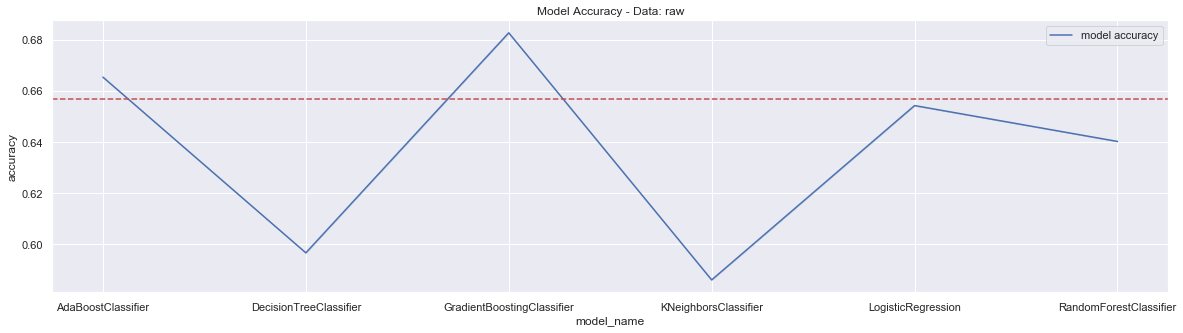

In [29]:
f, a = plt.subplots(1, 1, figsize=(20, 5))
sns.lineplot(x="model_name", y="accuracy", data=report, label="model accuracy")
a.axhline(baseline_accuracy, ls='--', color='r')
a.set_title(f"Model Accuracy - Data: {DESCRIPTION}")

In [30]:
print(f'Last Finished: {datetime.now().strftime(DATE_FORMAT)}')

Last Finished: 2019-10-23 23:10
